In [1]:
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.models import Sequential

In [3]:
train_dataset_path = "D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Training"
test_dataset_path = "D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Testing"

In [4]:
input_shape= (224,224,3)

datagen = ImageDataGenerator(
rescale=1./255
)

Train_gen = datagen.flow_from_directory(
    train_dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset=None
)

Test_gen = datagen.flow_from_directory(
    test_dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset=None
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(filters=64,kernel_size=3,input_shape=(224,224,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(filters=32,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(filters=16,kernel_size=3,activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dense(384,activation='relu'),
    Dense(256,activation='relu'),
    Dense(4,activation='softmax'),
])

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
H = model.fit(Train_gen,epochs=3,validation_data=Test_gen)

Epoch 1/3
90/90 [==============================] - 126s 1s/step - loss: 0.9453 - accuracy: 0.5787 - val_loss: 1.7306 - val_accuracy: 0.4061
Epoch 2/3
90/90 [==============================] - 122s 1s/step - loss: 0.5193 - accuracy: 0.7909 - val_loss: 2.1102 - val_accuracy: 0.4670
Epoch 3/3
90/90 [==============================] - 122s 1s/step - loss: 0.3099 - accuracy: 0.8780 - val_loss: 2.0106 - val_accuracy: 0.5761


In [12]:
import os
labels = os.listdir("D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Training")
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [29]:
import random

def get_random_paths(path):
    imgs = []
    for root,dir,files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                imgs.append(os.path.join(root,file))
    random_img_path = random.choice(imgs)
    return random_img_path
                

In [30]:
x_test_path = get_random_paths("D:\Deep Learning\Deep Learning - Datasets\Brain Tumor\Testing")

In [31]:
import numpy as np
from keras.preprocessing import image

img = image.load_img(x_test_path,target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,0)

1/1 [==============================] - 0s 55ms/step
no_tumor


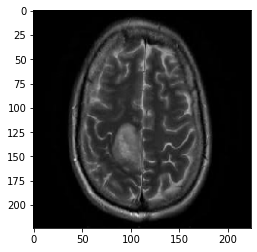

In [32]:
predicted_value = model.predict(img_array)
output = np.argmax(predicted_value)

plt.imshow(img)
print(labels[output])

In [33]:
test_loss ,test_acc = model.evaluate(Test_gen)

13/13 [==============================] - 4s 306ms/step - loss: 2.0106 - accuracy: 0.5761


In [34]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1Note: you may need to restart the kernel to use updated packages.

anaconda-project                   0.10.1
anyio                              3.6.2


You should consider upgrading via the 'C:\Users\Hp\anaconda3\python.exe -m pip install --upgrade pip' command.


appdirs                            1.4.4
apyori                             1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2.0
beautifulsoup4                     4.10.0
binaryornot                        0.4.4
bitarray                           2.3.0
bkcharts                           0.2
black       

pyasn1-modules                     0.2.8
pycodestyle                        2.7.0
pycosat                            0.6.3
pycparser                          2.20
pycryptodome                       3.11.0
pycurl                             7.44.1
pydocstyle                         6.1.1
pyerfa                             2.0.0
pyflakes                           2.3.1
Pygments                           2.10.0
PyJWT                              2.4.0
pylint                             2.9.6
pyls-spyder                        0.4.0
PyNaCl                             1.4.0
pyodbc                             4.0.0-unsupported
pyOpenSSL                          21.0.0
pyparsing                          2.4.7
PyPDF2                             1.26.0
pypiwin32                          223
pyreadline                         2.1
pyrsistent                         0.18.0
PySocks                            1.7.1
pytest                             6.2.4
python-dateutil                    2.8.2
pyt

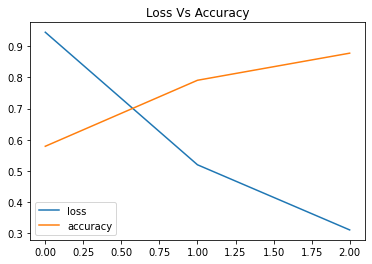

In [35]:
plt.title('Loss Vs Accuracy')
plt.plot(H.history['loss'],label='loss')
plt.plot(H.history['accuracy'],label='accuracy')
plt.legend()